# Aggregations: Min, Max, and Everything in Between

Often when you are faced with a large amout of data, a first step is to compute summary statistics for the data in question.  Perhaps the most common summary statistics are mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (the sum, product, median, minimum, maximum, quantiles, ect.).

NumPy has fast built-in aggregation functions working on arrays; we'll discuss and demonstrate some of them here.

## Summing the Values in an Array

As a quick example, consider computing the sum of all values in an array.  Python itself can do this using the built-in `sum` function:

In [1]:
import numpy as np

In [2]:
L = np.random.random(100)
sum(L)

53.30923167047889

The syntax is quite similar to that of NumPy's `sum` function, and the result is the same in the simplest case:

In [3]:
np.sum(L)

53.309231670478894

However, becasue it executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:

In [4]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

376 ms ± 40.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.04 ms ± 159 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Be careful though, the `sum` function and the `np.sum` function are not identical, which can sometimes lead to confusion!  In particular, their optional arguments have different meanings, and `np.sum` is aware of multiple array dimensions, as we will se in the following section.

## Minimum and Maximum

Similarly, Python has built-in `min` and `max` functions, used to find the minimum value and the maximum value of any given array:

In [5]:
min(big_array), max(big_array)

(1.9259075689781469e-07, 0.9999992294210022)

NumPy's corresponding functions have similar syntax, and again operate much more quickly:

In [6]:
np.min(big_array), np.max(big_array)

(1.9259075689781469e-07, 0.9999992294210022)

In [8]:
%timeit min(big_array)
%timeit np.min(big_array)

263 ms ± 33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
847 µs ± 27.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Whenever possible, make sure that you are using the NumPy version of these aggregates when operating on NumPy arrays!

#### Multidimensional aggregates
One common type of aggregation operation is an aggregate along a row or column.  Say you have some data stored in a two-dimensional array:

In [9]:
M = np.random.random((3,4))
print(M)

[[0.6842286  0.24919755 0.9427999  0.49710518]
 [0.92477703 0.38768675 0.92959117 0.45472111]
 [0.67658117 0.92791706 0.07787253 0.02831696]]


By default, each NumPy aggregation will return the aggregate over the entire array:

In [12]:
M.sum()

6.780794997348058

Aggregation functions take an additional argument specifying the *axis* along which the aggregate is computed.  For example, we can find the minimum value within each column by specifying `axis=0`:

In [13]:
M.min(axis=0)

array([0.67658117, 0.24919755, 0.07787253, 0.02831696])

The function returns four values, corresponding to the four columns of numbers. 

Similarly, we can find the maximum value within each row:

In [14]:
M.max(axis=1)

array([0.9427999 , 0.92959117, 0.92791706])

The way the axis is specified here can be confusing to users coming from other languages.  The `axis` keyword specifies the *dimensions of the array that will be collapsed* rather than the dimension that will be returned.  So specifying `axis=0` means that the first axis will be collapsed: for two-dimensional arrays, this means that the values within each column will be aggregated.

#### Other aggregation functions

NumPy provides many other aggregation functions, but we won't discuss them in detail here.  Additionally, most aggregates have a `NaN`-safe counterpart that computes the result while ignoring missing values, which are marked by the speciall IEEE floating-point `NaN` value (for a fuller discussion of missing data, see "Handeling Missing Data" in chapter 3).  Some of these `NaN`-safe functions were not added until NumPy 1.8, so they will not be available in older NumPy versions

Here is a table that provides a list of useful aggregation functions available in NumPy:

| Function Name | NaN-safe Version | Descriptions |
|---------------|--------------------|--------------|
| `np.sum` | `np.nansum` | Compute sum of elements |
| `np.prod` | `np.nanprod` | Compute product of elements |
| `np.mean` | `np.nanmean` | Compute mean of elements |
| `np.std` | `np.nanstd` | Compute standard deviation | 
| `np.var` | `np.nanvar` | Compute variance | 
| `np.min` | `np.nanmin` | Find minimum value | 
| `np.max` | `np.nanmax` | Find maximum value | 
| `np.argmin` | `np.nanargmin` | Find index of minimum value |
| `np.argmax` | `np.nanargmax` | Find index of maximum value | 
| `np.median` | `np.nanmedian` | Compute median of elements |
| `np.percentile` | `np.nanpercentile` | Compute rank-based statistics of elements | 
| `np.any` | N/A | Evaluate whether any elements are true | 
| `np.all` | N/A | Evaluate whether all elements are true |

We will use these often throughout the rest of this book

### Example: What is the Average Height of US Presidents?

Aggregates available in NumPy can be extremely useful for summarizing a set of values.  As a simple example, let's consider the heights of all US presidents.  This data is available in the file *president_heights.csv*, which is a simple comma-separated list of labels and values

In [22]:
import pandas as pd
data = pd.read_csv('C:/Users/tim/Desktop/DataScienceHandbook/PythonDataScienceHandbook/notebooks/data/president_heights.csv')
height = np.array(data['height(cm)'])
height

array([189, 170, 189, 163, 183, 171, 185, 168, 173, 183, 173, 173, 175,
       178, 183, 193, 178, 173, 174, 183, 183, 168, 170, 178, 182, 180,
       183, 178, 182, 188, 175, 179, 183, 193, 182, 183, 177, 185, 188,
       188, 182, 185], dtype=int64)

In [30]:
print('Mean Height:\t\t', np.mean(height))
print('Standard Deviation:\t', np.std(height))
print('Minimum Height\t\t', np.min(height))
print('Maximum Height:\t\t', np.max(height))

Mean Height:		 179.73809523809524
Standard Deviation:	 6.931843442745892
Minimum Height		 163
Maximum Height:		 193


Note that in each case, the aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values.  We may also wish to compute quantiles:

In [34]:
print('25th percentile:\t', np.percentile(height, 25))
print('Median:\t\t\t', np.median(height))
print('75th percentile:\t', np.percentile(height, 75))

25th percentile:	 174.25
Median:			 182.0
75th percentile:	 183.0


We see that median height of US presidents is 182 cm, or just shy of six feet.

Of course sometimes it's more useful to see a visual representation of thsi data, which we can accomplish using tools in Matplotlib (discussed more in chapter 5).  For example this code generates the a histogram

In [35]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot style

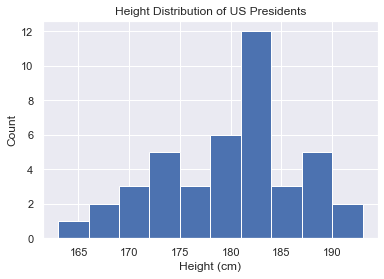

In [38]:
plt.hist(height)
plt.title('Height Distribution of US Presidents')
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.show()# gets rid of the text at the top

These aggregates are some of the fundamental pieces of exploratory data analysis that we'll explore in more depth in later chapters of this book